In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re 
import seaborn as sns
import matplotlib.pyplot as plt
import os

/tmp/ipykernel_37048/2844488940.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
csv_name = "BSAIF22.csv"

path_roll_numbers = os.path.join("source_csv", csv_name)
roll_number = pd.read_csv(path_roll_numbers)
roll_numbers = roll_number["roll_numbers"].values
roll_number

,roll_numbers,names
0,210621,Muhammad Talha Ehtisham
1,220470,Muhammad Abdullah Shaheer
2,220480,Hafiz Muhammad Sami Ullah Khan
3,220536,Syed Hashir Asim
4,220952,Bilal Abid
5,220953,Jawad Ali Yousafzai
6,220955,Ahad Saeed
7,220958,Aqil Ahmed
8,220959,Samreen Fatima
9,220960,Majid Hussain


# GPA Scrapper


Fetching Result of:  210621
200

Fetching Result of:  220470
200

Fetching Result of:  220480
200

Fetching Result of:  220536
200

Fetching Result of:  220952
200

Fetching Result of:  220953
200

Fetching Result of:  220955
200

Fetching Result of:  220958
200

Fetching Result of:  220959
200

Fetching Result of:  220960
200

Fetching Result of:  220961
200

Fetching Result of:  220962
200

Fetching Result of:  220963
200

Fetching Result of:  220964
200

Fetching Result of:  220965
200

Fetching Result of:  220966
200

Fetching Result of:  220967
200

Fetching Result of:  220968
200

Fetching Result of:  220969
200

Fetching Result of:  220970
200

Fetching Result of:  220971
200

Fetching Result of:  220973
200

Fetching Result of:  220974
200

Fetching Result of:  220975
200

Fetching Result of:  220976
200

Fetching Result of:  220977
200

Fetching Result of:  220978
200

Fetching Result of:  220980
200

Fetching Result of:  220981
200

Fetching Result of:  220982
200

Fetching 

/tmp/ipykernel_37048/1033874632.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['GPA'] = cleaned['GPA'].astype(float)
/tmp/ipykernel_37048/1033874632.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned['GPA'])


<Axes: xlabel='Name'>

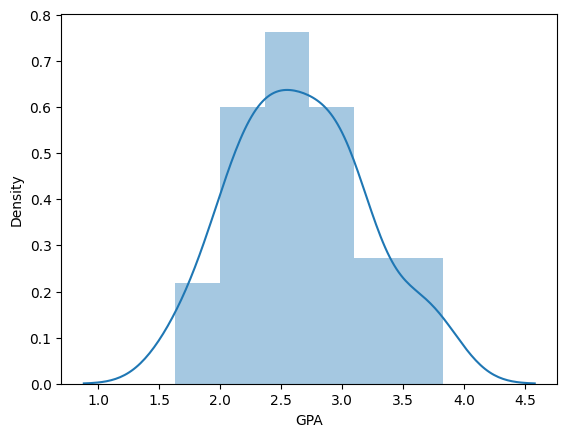

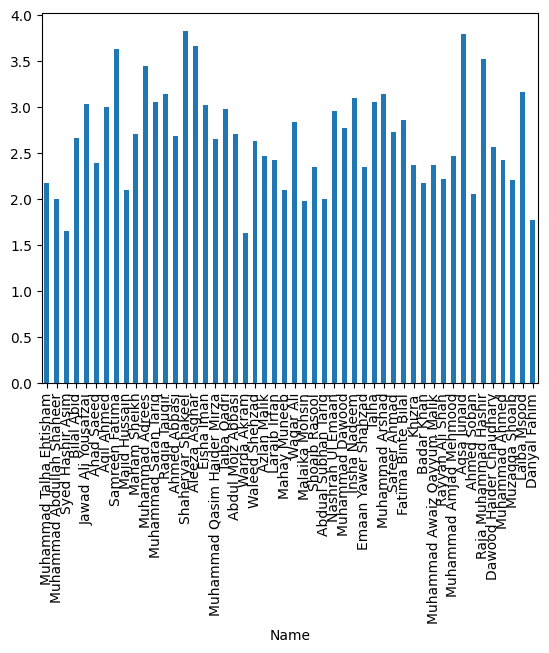

In [11]:
url = "https://portals.au.edu.pk/auresult/"

headers = {
    "Host": "portals.au.edu.pk",
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:121.0) Gecko/20100101 Firefox/121.0"
}

data_list = []

for roll in roll_numbers:
    print("\nFetching Result of: ", roll)
    
    payload = {
        "__EVENTTARGET": "",
        "__EVENTARGUMENT": "",
        "__VIEWSTATE": "",
        "__VIEWSTATEGENERATOR": "",
        "ctl00$AUContent$txt_regid": str(roll),
        "__ASYNCPOST": "true",
        "ctl00$AUContent$btnShow": "Search Result"
    }
    
    response = requests.post(url, headers=headers, data=payload)
    print(response.status_code)
    
    soup = BeautifulSoup(response.text, 'lxml')
    
    # Find all tables on the page
    tables = soup.find_all('table')
    
    # Initialize a set to store unique data
    unique_data = set()
    
    name_pattern = re.compile(r'Name\s*:\s*([\w\s]+)')
    gpa_pattern = re.compile(r'GPA\s*:\s*([\d.]+)')
    
    
    
    # Iterate through all tables
    if len(tables) >2 :
        for table in tables:
            # Iterate over each row in the table (skip the header row if necessary)
            for row in table.find_all('tr'):
                # Extract the text from each cell in the row
                # and add it to a list representing that row
                cols = row.find_all('td')
                cols = [ele.text.strip() for ele in cols]
                # Ensure that you have data (ignore empty/invalid rows)
                # print(cols)
                
                name_match = name_pattern.search(' '.join(cols))
                gpa_match = gpa_pattern.search(' '.join(cols))
                
                if name_match:
                    name = name_match.group(1).split("\n")[0]
                        
                if gpa_match:
                    gpa= gpa_match.group(1)
    else:
        name = None
        gpa = None
        
    data_list.append({"Roll Number": roll, "Name": name, "GPA": gpa})



df = pd.DataFrame(data_list)
df.to_csv(os.path.join("source_csv", csv_name.split(".")[0]+"-result.csv"), index=False)
cleaned = df.dropna()
cleaned['GPA'] = cleaned['GPA'].astype(float)

sns.distplot(cleaned['GPA'])
cleaned.plot(x='Name', y='GPA', kind='bar', legend=False)


# Subjects Grade and Gpa Scrapper

In [14]:
url = "https://portals.au.edu.pk/auresult/"

headers = {
    "Host": "portals.au.edu.pk",
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:121.0) Gecko/20100101 Firefox/121.0"
}

data_list = []

for i, roll in enumerate(roll_numbers):
    subjects = {}
    print("\nFetching Result of: ", roll)
    
    subjects["name"] = roll_number.iloc[i]["names"]
    subjects["roll_number"] = roll_number.iloc[i]["roll_numbers"]
    
    payload = {
        "__EVENTTARGET": "",
        "__EVENTARGUMENT": "",
        "__VIEWSTATE": "",
        "__VIEWSTATEGENERATOR": "",
        "ctl00$AUContent$txt_regid": str(roll),
        "__ASYNCPOST": "true",
        "ctl00$AUContent$btnShow": "Search Result"
    }
    
    response = requests.post(url, headers=headers, data=payload)
    print(response.status_code)
    
    soup = BeautifulSoup(response.text, 'lxml')
    # Find all tables on the page
    tables = soup.find_all('table')
    

    # Iterate through all tables
    if len(tables) >2:
        for row in tables[2].find_all('tr')[2:]:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            if len(cols)>1:
                subjects[cols[0]] = cols[-1]
            subjects["gpa"] = cols[0].split("\n")[-1]
    else:
        pass

    data_list.append(subjects)
    # print(subjects)
    

dataframe = pd.DataFrame(data_list)
dataframe.to_csv(os.path.join("scrapped_result", csv_name.split(".")[0]+"-result.csv"), index=False)
dataframe


Fetching Result of:  210621
200

Fetching Result of:  220470
200

Fetching Result of:  220480
200

Fetching Result of:  220536
200

Fetching Result of:  220952
200

Fetching Result of:  220953
200

Fetching Result of:  220955
200

Fetching Result of:  220958
200

Fetching Result of:  220959
200

Fetching Result of:  220960
200

Fetching Result of:  220961
200

Fetching Result of:  220962
200

Fetching Result of:  220963
200

Fetching Result of:  220964
200

Fetching Result of:  220965
200

Fetching Result of:  220966
200

Fetching Result of:  220967
200

Fetching Result of:  220968
200

Fetching Result of:  220969
200

Fetching Result of:  220970
200

Fetching Result of:  220971
200

Fetching Result of:  220973
200

Fetching Result of:  220974
200

Fetching Result of:  220975
200

Fetching Result of:  220976
200

Fetching Result of:  220977
200

Fetching Result of:  220978
200

Fetching Result of:  220980
200

Fetching Result of:  220981
200

Fetching Result of:  220982
200

Fetching 

,name,roll_number,F-23-Computer Organization and Assembly Language Lab-774,gpa,F-23-Computer Organization and Assembly Language-773,F-23-Data Structures & Algorithms Lab-768,F-23-Data Structures & Algorithms-767,F-23-Differential Equations-769,F-23-Probability and Statistics-770,F-23-Programming for Artificial Intelligence Lab-772,F-23-Programming for Artificial Intelligence-771,F-23-Digital Logic Design Laboratory-387,F-23-Digital Logic Design-386,F-23-Foundational Mathematics-2080,F-23-Calculus & Analytical Geometry-1096,F-23-Introduction to Information and Communication Technologies Lab-1956,F-23-Introduction to Information and Communication Technologies-1948,F-23-Programming Fundamentals Lab-777,F-23-Programming Fundamentals-776
0,Muhammad Talha Ehtisham,210621,B,2.18,B-,C+,C,B+,XW,B,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Muhammad Abdullah Shaheer,220470,B,2,D,B-,B-,D,C,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hafiz Muhammad Sami Ullah Khan,220480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Syed Hashir Asim,220536,B-,1.65,D,B+,C-,C,D,B,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bilal Abid,220952,B,2.67,D,B,B,B+,B,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jawad Ali Yousafzai,220953,A-,3.04,C,B-,C+,A,A-,B+,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahad Saeed,220955,B,2.39,D,B,C+,B-,B,B,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aqil Ahmed,220958,B+,3,B,B-,B,C+,B-,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Samreen Fatima,220959,A-,3.63,A,B-,B+,A-,A-,B+,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Majid Hussain,220960,B-,2.1,D,B-,C,C+,C,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataframe

,name,roll_number,F-23-Computer Organization and Assembly Language Lab-774,gpa,F-23-Computer Organization and Assembly Language-773,F-23-Data Structures & Algorithms Lab-768,F-23-Data Structures & Algorithms-767,F-23-Differential Equations-769,F-23-Probability and Statistics-770,F-23-Programming for Artificial Intelligence Lab-772,F-23-Programming for Artificial Intelligence-771,F-23-Digital Logic Design Laboratory-387,F-23-Digital Logic Design-386,F-23-Foundational Mathematics-2080,F-23-Calculus & Analytical Geometry-1096,F-23-Introduction to Information and Communication Technologies Lab-1956,F-23-Introduction to Information and Communication Technologies-1948,F-23-Programming Fundamentals Lab-777,F-23-Programming Fundamentals-776
0,Muhammad Talha Ehtisham,210621,B,2.18,B-,C+,C,B+,XW,B,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Muhammad Abdullah Shaheer,220470,B,2,D,B-,B-,D,C,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hafiz Muhammad Sami Ullah Khan,220480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Syed Hashir Asim,220536,B-,1.65,D,B+,C-,C,D,B,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bilal Abid,220952,B,2.67,D,B,B,B+,B,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jawad Ali Yousafzai,220953,A-,3.04,C,B-,C+,A,A-,B+,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahad Saeed,220955,B,2.39,D,B,C+,B-,B,B,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aqil Ahmed,220958,B+,3,B,B-,B,C+,B-,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Samreen Fatima,220959,A-,3.63,A,B-,B+,A-,A-,B+,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Majid Hussain,220960,B-,2.1,D,B-,C,C+,C,B,B-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Mam Asra Ki bache Grades kha gai itne D

In [22]:
dataframe["F-23-Computer Organization and Assembly Language-773"].value_counts()

F-23-Computer Organization and Assembly Language-773
D     9
C-    9
B-    8
C+    8
C     6
A-    2
A     2
B     1
B+    1
Name: count, dtype: int64

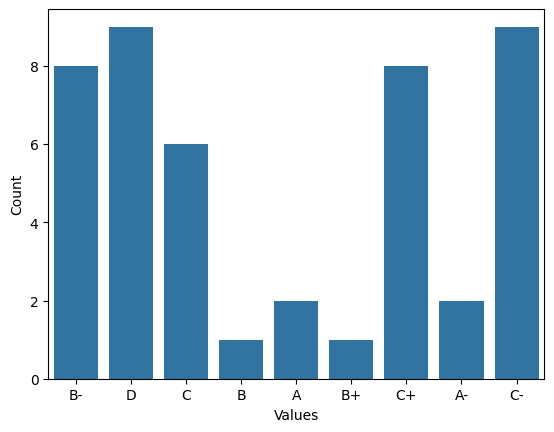

In [23]:
sns.countplot(x='F-23-Computer Organization and Assembly Language-773', data=dataframe)
plt.xlabel('Values')
plt.ylabel('Count')

# Display the plot
plt.show()

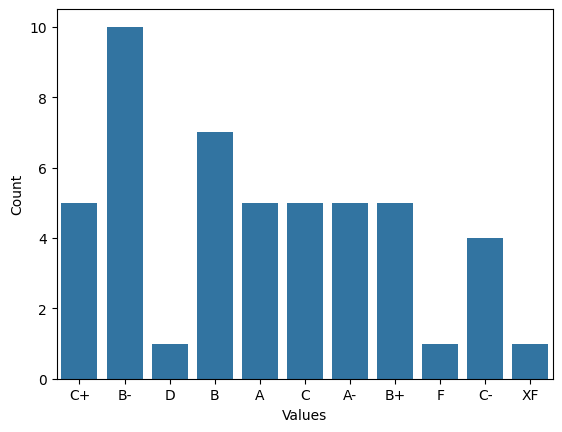

In [285]:
sns.countplot(x='F-23-Programming for Artificial Intelligence-771', data=dataframe)
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

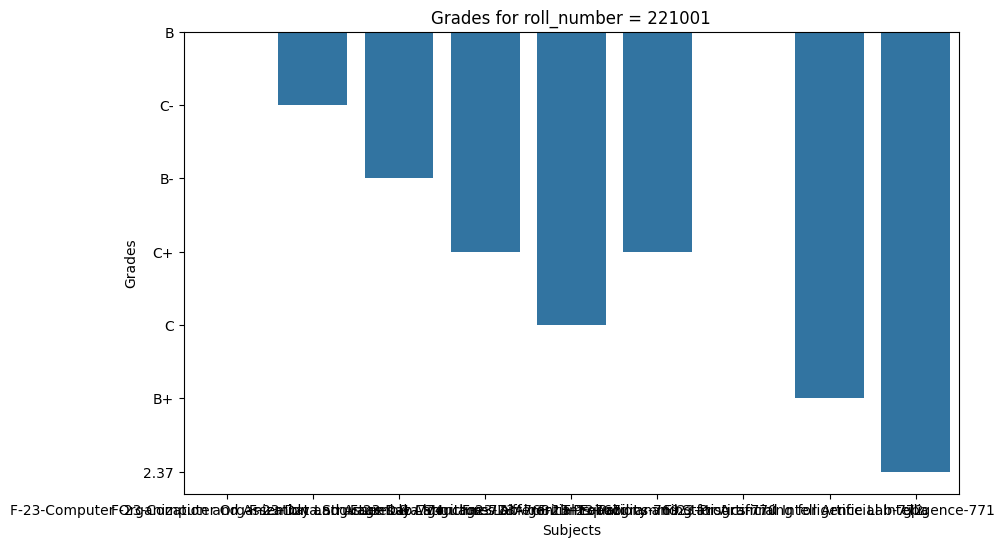

In [312]:
selected_row = dataframe[dataframe["roll_number"] == 221001]
selected_row = selected_row.dropna(axis=1, how='all')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_row.columns[2:], y=selected_row.values.flatten()[2:])
plt.xlabel('Subjects')
plt.ylabel('Grades')
plt.title(f'Grades for roll_number = 221001')
plt.show()

# Uper wale Toppers 

In [316]:
df_sorted = dataframe.sort_values(by='gpa', ascending=False)
new_df = df_sorted.iloc[:, [0, -4]].dropna(axis=1, how='all')
new_df = new_df.reset_index(drop=True)
new_df

,name,gpa
0,Shaheryar Shakeel,3.83
1,Aqsa Junaid,3.8
2,Aleeza Asghar,3.67
3,Samreen Fatima,3.63
4,Raja Muhammad Hashir,3.52
5,Muhammad Adrees,3.45
6,Laiba Masood,3.17
7,Muhammad Arshad,3.14
8,Raqia Tauqir,3.14
9,Insha Nadeem,3.1


# neeche wale Toppers 

In [317]:
df_sorted = dataframe.sort_values(by='gpa', ascending=True)
new_df = df_sorted.iloc[:, [0, -4]].dropna(axis=1, how='all')
new_df = new_df.reset_index(drop=True)
new_df

,name,gpa
0,Warda Akram,1.63
1,Syed Hashir Asim,1.65
2,Malaika Mohsin,1.98
3,Muhammad Abdullah Shaheer,2
4,Abdual Subhan Tariq,2
5,Ahmed Soban,2.06
6,Mahay Muneeb,2.1
7,Majid Hussain,2.1
8,Badar Khan,2.18
9,Muhammad Talha Ehtisham,2.18
